# Feature Analysis

### Imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

%matplotlib inline

# Dataset Vision

Load the dataset based on vision. Drop the filename, if there are any abnormalities we can go back to the imagefile to see where somemthing went wrong. Drop the last column, because it is empty.

In [3]:
data_vision = pd.read_csv('../dataset-numpy/dataset-vision.csv')
data_vision.drop(data_vision.columns[1], axis=1, inplace=True) # Removes filename
data_vision.drop(data_vision.columns[[-1]], axis=1, inplace=True) # Removes empty column
data_vision.head(8)

,label,number_of_holes,width,height,aspect_ratio,area,angle,radius,contour,hull_radius
0,7,0,18,30,0.586207,239.5,90.000000,10.070714,43,13.393886
1,5,0,19,30,0.620690,268.0,90.000000,9.398557,41,13.869198
2,9,0,20,30,0.617100,298.5,77.471192,10.730719,40,12.517610
3,9,0,21,30,0.648234,258.0,87.397438,10.973873,51,14.120958
4,7,0,19,30,0.600791,208.5,87.797402,9.175094,43,13.692049
5,6,1,22,30,0.583077,321.0,64.653822,10.740342,39,12.825612
6,2,0,20,30,0.523715,204.0,79.380345,9.882027,43,14.222969
7,0,1,20,30,0.655172,432.5,90.000000,12.376150,33,12.942045


### Data distribution

#### Total distribution
Looking at the whole dataset containing all the numbers(labels), it looks nicely distributed. There are no strange outliers.
- Labels should be numbers from 0 to 9.
- Number of holes should be between 0 and 2.
- Width should be between minimum width 0 and maximum width 32 pixels.
- Height should be between minimum height 0 and maximum height 32 pixels.
- Aspect ratio be between minimum ratio 0 and maximum ratio 1 of the of the number (W/H).
- Area should be between minimum area 0 and maximum area 1024 (number of pixels of the number)
- Angle should be between minimum angle -90 and maximum angle +90 degrees
- Radius should be the average distance of each contourpoint from the centroid.
- Contour the amount of contourpoints that the number has, larger then 0.
- Hull radius the radius of the convex hull contour from the centroid, larger then 0.

In [4]:
data_vision.describe()

,label,number_of_holes,width,height,aspect_ratio,area,angle,radius,contour,hull_radius
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,4.532813,0.376042,20.457292,29.997917,0.852753,291.653385,50.857330,10.493405,44.952083,13.664167
std,2.868122,0.574106,2.035446,0.064533,0.439098,67.428881,65.489537,0.889372,8.744703,0.814930
min,0.000000,0.000000,10.000000,28.000000,0.310345,153.000000,-87.878899,8.303587,20.000000,11.549360
25%,2.000000,0.000000,20.000000,30.000000,0.605262,244.000000,65.718203,9.822737,39.000000,13.067626
50%,5.000000,0.000000,20.000000,30.000000,0.655172,275.500000,85.236358,10.369215,44.000000,13.617666
75%,7.000000,1.000000,22.000000,30.000000,0.724138,326.000000,90.000000,11.043633,51.000000,14.191667
max,9.000000,2.000000,30.000000,30.000000,3.171172,512.000000,90.000000,13.117590,88.000000,16.446964


#### Distribution per number
To be able to take a closer look at the distribution per number we will be creating plots for all the feature vectors.

In [5]:
data_vision.groupby(['label']).describe()

angle        area  aspect_ratio     contour      height  \
label                                                                       
0     count  177.000000  177.000000    177.000000  177.000000  177.000000   
      mean    82.820056  436.200565      0.691432   34.977401   30.000000   
      std     31.359896   38.278705      0.175247    5.205935    0.000000   
      min    -87.273689  231.500000      0.551724   22.000000   30.000000   
      25%     90.000000  424.000000      0.655172   32.000000   30.000000   
      50%     90.000000  440.500000      0.655172   34.000000   30.000000   
      75%     90.000000  453.000000      0.664935   37.000000   30.000000   
      max     90.000000  512.000000      1.663636   60.000000   30.000000   
1     count  198.000000  198.000000    198.000000  198.000000  198.000000   
      mean    38.609255  283.767677      0.968201   36.313131   29.979798   
      std     76.450359   44.815205      0.678111    6.101754    0.200497   
      min    -87.797401  185.500000      0.310345   20.000000   28.000000   
      25%    -80.973925  249.000000      0.539041   32.000000   30.000000   
      50%     85.030259  279.500000      0.615370   36.000000   30.000000   
      75%     90.000000  318.750000      1.565455   41.000000   30.000000   
      max     90.000000  376.000000      3.171172   51.000000   30.000000   
2     count  195.000000  195.000000    195.000000  195.000000  195.000000   
      mean    81.104630  249.153846      0.671576   47.071795   30.000000   
      std     24.928123   29.983663      0.168397    6.870299    0.000000   
      min    -87.709389  187.500000      0.460784   31.000000   30.000000   
      25%     82.052366  224.500000      0.607622   43.000000   30.000000   
      50%     85.030259  250.500000      0.651235   47.000000   30.000000   
      75%     90.000000  272.000000      0.694318   50.000000   30.000000   
      max     90.000000  342.000000      1.676190   76.000000   30.000000   
3     count  199.000000  199.000000    199.000000  199.000000  199.000000   
      mean    82.190980  247.271357      0.673131   52.195980   30.000000   
      std     27.412824   30.151792      0.218891    6.074186    0.000000   
      min    -87.709389  187.500000      0.461538   37.000000   30.000000   
      25%     84.140200  223.000000      0.593931   48.000000   30.000000   
      50%     87.273689  246.000000      0.627068   52.000000   30.000000   
...                 ...         ...           ...         ...         ...   
6     std     14.792647   33.169580      0.105367    5.139672    0.000000   
      min    -85.426079  219.000000      0.477778   27.000000   30.000000   
      25%     64.726350  274.500000      0.564538   39.000000   30.000000   
      50%     70.559965  298.000000      0.587065   42.000000   30.000000   
      75%     77.195734  323.250000      0.619640   46.000000   30.000000   
      max     90.000000  376.500000      1.905128   65.000000   30.000000   
7     count  199.000000  199.000000    199.000000  199.000000  199.000000   
      mean    51.402566  250.062814      0.924716   48.783920   30.000000   
      std     69.208452   28.544929      0.453992    5.828227    0.000000   
      min    -87.878899  186.000000      0.551582   32.000000   30.000000   
      25%     73.832531  226.000000      0.629306   45.000000   30.000000   
      50%     90.000000  249.500000      0.689655   48.000000   30.000000   
      75%     90.000000  272.000000      1.450000   53.000000   30.000000   
      max     90.000000  346.000000      1.959799   65.000000   30.000000   
8     count  180.000000  180.000000    180.000000  180.000000  180.000000   
      mean    53.766461  360.491667      0.840006   40.138889   30.000000   
      std     68.700813   46.660801      0.439072    4.920331    0.000000   
      min    -87.510445  228.500000      0.517241   28.000000   30.000000   
      25%     79.207775  337.375000      0.599740   37.000000   30.000000   
      50%     

## Distribution dataset-vision plots

### General setup
Variables for having a constant view per plot.

In [9]:
data_vision_per_label= data_vision.groupby(['label'])
n_groups = int(len(data_vision_label))
colors = cm.jet(np.linspace(0, 1, n_groups)) # Each label will get its own color
opacity = 0.007 # When multiple coordinates overlap, the opacity will increase due to layering

### Occurance of a number within dataset-vision
To be able to see the amount of times a number occurs within the dataset, a new dataframe is created, containing the label and the count (occurance). Using a bar chart to show the occurance.

In [10]:
data_vision_label= data_vision_per_label.size().to_frame(name='count').reset_index()
data_vision_label

,label,count
0,0,177
1,1,198
2,2,195
3,3,199
4,4,186
5,5,187
6,6,195
7,7,199
8,8,180
9,9,204


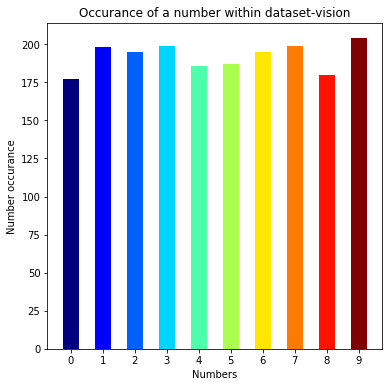

In [11]:
label_count = data_vision_label['count']

fig,ax = plt.subplots(figsize=(6,6))

ax.bar(np.arange(n_groups), label_count, 0.5, color=colors)
ax.set_xlabel('Numbers')
ax.set_ylabel('Number occurance')
ax.set_title('Occurance of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.show()

### Amount of holes per number
To be able to see the amount of holes in a number within the dataset, a new dataframe is created, containing the label and the count for amount of holes in a number. Using a scatterplot to show the occurance of the holes per number.

In [435]:
data_vision_holes = data_vision.groupby(['label', 'number_of_holes']).size().to_frame(name='count').reset_index()
display(data_vision_holes)

,label,number_of_holes,count
0,0,0,4
1,0,1,173
2,1,0,198
3,2,0,193
4,2,1,2
5,3,0,194
6,3,1,5
7,4,0,171
8,4,1,15
9,5,0,184


In the plot you can see that numbers containing 0 holes are most likely 1, 2, 3, 4, 5, or 7. 
Numbers containing 1 hole are most likely to be 0, 6, 8, or 9. 
Numbers containing 2 holes are always 8.

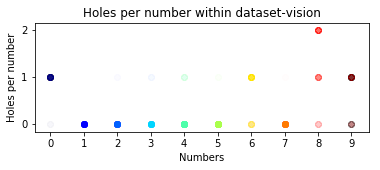

In [436]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,2))

for labels in data_vision.groupby(['label']):
    holes = labels[1].number_of_holes
    x = [labels[0] for _ in range(len(holes))]
    ax.scatter(x, holes, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Holes per number')
ax.set_title('Holes per number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks([0, 1, 2])
plt.show()

### Width per number
To be able to see the width of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the width occurance per number.

If the width is smaller than 15 it is most likely to be a 1.
For the other widths it is harder to specify which width belongs to which number.

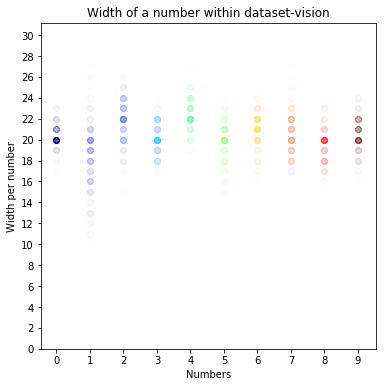

In [437]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,6))

for labels in data_vision.groupby(['label']):
    n_width = labels[1].width
    x = [labels[0] for _ in range(len(n_width))]
    ax.scatter(x, n_width, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Width per number')
ax.set_title('Width of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(0, 32, 2.0))
plt.show()

### Heigth per number
To be able to see the height of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the height occurance per number.

We are unable to conclude which number is which since all of the numbers have the same height.

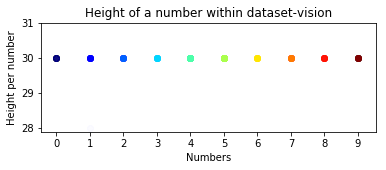

In [438]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,2))

for labels in data_vision.groupby(['label']):
    n_height = labels[1].height
    x = [labels[0] for _ in range(len(n_height))]
    ax.scatter(x, n_height, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Height per number')
ax.set_title('Height of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(28, 32, 1.0))
plt.show()

### Aspect ratio per number
To be able to see the aspect ratio of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the aspect ratio occurance per number.

If the aspect ratio is between 1.2 and 1.7 it is most likely to be a 4. We are unable to conclude any other number since there is no distinct difference in aspect ratio.

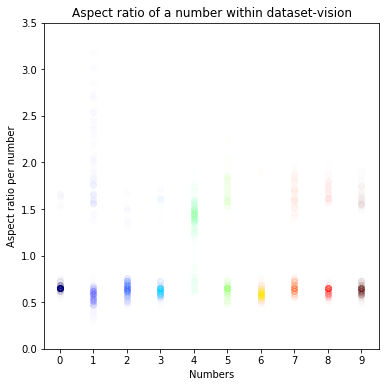

In [439]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,6))

for labels in data_vision.groupby(['label']):
    n_aspect_ratio = labels[1].aspect_ratio
    x = [labels[0] for _ in range(len(n_aspect_ratio))]
    ax.scatter(x, n_aspect_ratio, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Aspect ratio per number')
ax.set_title('Aspect ratio of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(0, 4, 0.5))
plt.show()

### Area per number
To be able to see the area of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the area occurance per number.

If the area is larger than 400 it is most likely to be a 0.
If the area is larger than 250 but smaller than 350 it is most likely to be a 1, 6, or 8.
The other numbers are not distinguishable by their area.

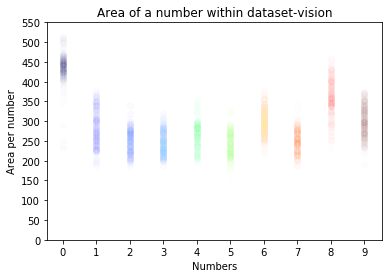

In [452]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,4))

for labels in data_vision.groupby(['label']):
    n_area = labels[1].area
    x = [labels[0] for _ in range(len(n_area))]
    ax.scatter(x, n_area, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Area per number')
ax.set_title('Area of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(0, 600, 50))
plt.show()

### Angle per number
To be able to see the width of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the width occurance per number.

If the angle is between -70 and -50 degrees it is most likely a 4. If the angle is between 50 and 70 degrees it is most likely a 6. The other numbers are unidentifiable by their angle. 

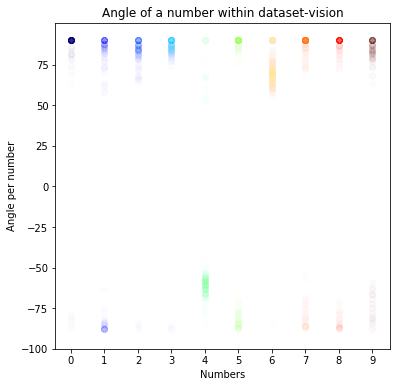

In [453]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,6))

for labels in data_vision.groupby(['label']):
    n_angle = labels[1].angle
    x = [labels[0] for _ in range(len(n_angle))]
    ax.scatter(x, n_angle, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Angle per number')
ax.set_title('Angle of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(-100, 100, 25))
plt.show()

### Radius per number
To be able to see the radius of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the radius occurance per number.

If the radius is larger than 11 and smaller than 13 it is most likely a 0. If the radius is larger than 10.5 and smaller than 12 it is most likely a 6, 8 or 9. The other numbers are not likely to be identified by the radius.

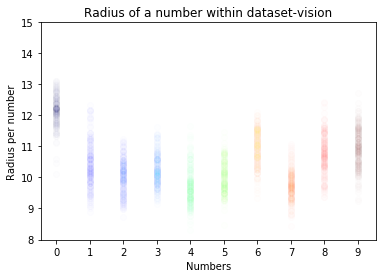

In [454]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,4))

for labels in data_vision.groupby(['label']):
    n_radius = labels[1].radius
    x = [labels[0] for _ in range(len(n_radius))]
    ax.scatter(x, n_radius, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Radius per number')
ax.set_title('Radius of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(8, 16, 1.0))
plt.show()

### Contour per number
To be able to see the contour of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the contour occurance per number.

If the contour is larger than 55, it is most likely to be a 4. If the contour is larger than 50 but smaller than 55 it is most likely a 3.
If the contour is smaller than 38 it is most likely a 0 or 1.

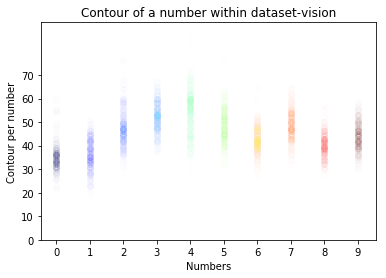

In [458]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,4))

for labels in data_vision.groupby(['label']):
    n_contour = labels[1].contour
    x = [labels[0] for _ in range(len(n_contour))]
    ax.scatter(x, n_contour, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Contour per number')
ax.set_title('Contour of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(0, 80, 10))
plt.show()

### Hull radius per number
To be able to see the hull radius of a number within the dataset, there is no need to create a new dataframe. Using a scatterplot to show the hull radius occurance per number.

If the hull radius is larger than 15 it is most likely a 2.

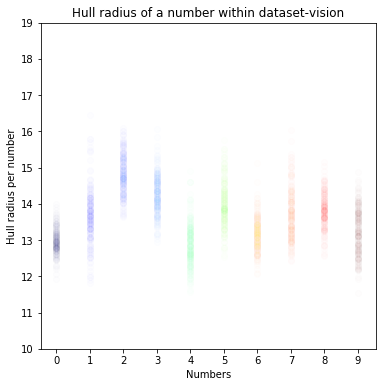

In [430]:
n_groups = int(len(data_vision_label))

fig,ax = plt.subplots(figsize=(6,6))

for labels in data_vision.groupby(['label']):
    n_hull = labels[1].hull_radius
    x = [labels[0] for _ in range(len(n_hull))]
    ax.scatter(x, n_hull, label=labels[0], color=colors[labels[0]], alpha=opacity)

ax.set_xlabel('Numbers')
ax.set_ylabel('Hull radius per number')
ax.set_title('Hull radius of a number within dataset-vision')

plt.xticks(np.arange(0, n_groups, 1.0))
plt.yticks(np.arange(10, 20, 1.0))
plt.show()

### Conclusion dataset-vision

Looking at the feature vectors, the following numbers are best identifiable (most likely to identify a individual number):
- Number of holes: 8
- Widht: 1
- Height: None
- Aspect ratio: 4
- Area: 0
- Angle: 4, 6
- Radius: 0
- Contour: 4, 3
- Hull radius: 2

# Dataset pixel
We have generated two pixel based datasets, using a 4x4 and 8x8 grid. There is a difference in detail / identifiability of the number by the pixel weight.

## Pixel 4x4
Load the dataset based on pixels in a 4x4 grid. Drop the filename, if there are any abnormalities we can go back to the imagefile to see where somemthing went wrong. Drop the last column, because it is empty.

In [442]:
data_pixel4x4 = pd.read_csv('../dataset-numpy/dataset-pixel4x4.csv')
data_pixel4x4.drop(data_pixel4x4.columns[1], axis=1, inplace=True) # Removes filename
data_pixel4x4.drop(data_pixel4x4.columns[[-1]], axis=1, inplace=True) # Removes empty column
data_pixel4x4.head(8)

,label,weight0_0,weight1_0,weight2_0,weight3_0,weight0_1,weight1_1,weight2_1,weight3_1,weight0_2,weight1_2,weight2_2,weight3_2,weight0_3,weight1_3,weight2_3,weight3_3
0,7,0,0,0,0,45,0,39,47,42,44,59,0,0,7,0,0
1,5,0,0,0,0,47,55,10,46,60,19,46,52,7,0,0,0
2,9,0,11,0,0,51,64,0,34,37,61,34,43,0,6,15,0
3,9,0,0,0,0,60,27,0,47,37,44,24,53,0,0,20,15
4,7,0,0,0,0,44,0,37,38,45,44,44,0,0,0,8,0
5,6,0,0,8,0,29,46,54,33,13,10,32,38,0,0,16,27
6,2,0,11,0,0,50,17,21,51,10,22,12,64,0,0,0,15
7,0,9,16,12,0,55,33,28,50,28,26,35,30,0,7,6,0


### Data distribution

#### Total distribution
Looking at the whole dataset containing all the numbers(labels), it looks nicely distributed. There are no strange outliers.

In [341]:
data_pixel4x4.describe()

,label,weight0_0,weight1_0,weight2_0,weight3_0,weight0_1,weight1_1,weight2_1,weight3_1,weight0_2,weight1_2,weight2_2,weight3_2,weight0_3,weight1_3,weight2_3,weight3_3
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,4.532813,1.552604,4.304688,2.988021,0.663542,42.083854,36.146354,31.041667,37.772396,38.385417,34.044271,36.941146,39.604687,3.624479,4.036458,6.033333,6.207292
std,2.868122,3.670701,6.109167,5.835094,2.570592,13.736854,16.564430,19.634315,14.408243,15.712947,17.880054,14.374293,16.657087,8.550139,7.047425,7.249297,10.212171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,36.000000,24.000000,15.000000,31.000000,29.000000,21.000000,28.000000,33.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,45.000000,39.000000,32.000000,40.000000,40.000000,38.000000,38.000000,44.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,9.000000,6.000000,0.000000,52.000000,49.000000,48.000000,47.000000,50.000000,48.000000,47.000000,51.000000,0.000000,7.000000,11.000000,10.000000
max,9.000000,22.000000,30.000000,39.000000,29.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,62.000000,36.000000,31.000000,55.000000


#### Distribution per number
To be able to take a closer look at the distribution per number we will be creating matrixes which contain all the feature vectors.

In [342]:
pixel4x4_label = data_pixel4x4.groupby(['label'])
pixel4x4_label.describe()

weight0_0   weight0_1   weight0_2   weight0_3   weight1_0  \
label                                                                     
0     count  177.000000  177.000000  177.000000  177.000000  177.000000   
      mean     0.559322   47.112994   38.045198    0.418079    8.977401   
      std      2.118140    7.373840   10.147111    1.851078    5.887154   
      min      0.000000   16.000000    6.000000    0.000000    0.000000   
      25%      0.000000   43.000000   32.000000    0.000000    6.000000   
      50%      0.000000   48.000000   38.000000    0.000000    9.000000   
      75%      0.000000   52.000000   45.000000    0.000000   13.000000   
      max     11.000000   64.000000   64.000000   11.000000   24.000000   
1     count  198.000000  198.000000  198.000000  198.000000  198.000000   
      mean     0.000000   30.217172   42.909091    0.934343    3.353535   
      std      0.000000   17.633560   14.999892    3.428861    6.126108   
      min      0.000000    0.000000    0.000000    0.000000    0.000000   
      25%      0.000000   17.000000   34.000000    0.000000    0.000000   
      50%      0.000000   34.000000   45.000000    0.000000    0.000000   
      75%      0.000000   44.750000   55.000000    0.000000    7.000000   
      max      0.000000   64.000000   64.000000   22.000000   30.000000   
2     count  195.000000  195.000000  195.000000  195.000000  195.000000   
      mean     4.800000   54.656410   26.866667    0.210256    5.046154   
      std      5.662865    6.569211   14.881756    2.105931    6.761239   
      min      0.000000   15.000000    0.000000    0.000000    0.000000   
      25%      0.000000   51.000000   15.500000    0.000000    0.000000   
      50%      0.000000   56.000000   27.000000    0.000000    0.000000   
      75%      9.000000   59.000000   38.000000    0.000000    9.500000   
      max     22.000000   64.000000   64.000000   28.000000   23.000000   
3     count  199.000000  199.000000  199.000000  199.000000  199.000000   
      mean     4.236181   48.447236   44.507538    1.487437    0.778894   
      std      4.906139    6.211425   10.339133    5.023037    2.646010   
      min      0.000000   30.000000    8.000000    0.000000    0.000000   
      25%      0.000000   44.000000   38.000000    0.000000    0.000000   
      50%      0.000000   49.000000   46.000000    0.000000    0.000000   
...                 ...         ...         ...         ...         ...   
6     std      0.572892    7.883714   13.992521    0.000000    4.784149   
      min      0.000000    0.000000    0.000000    0.000000    0.000000   
      25%      0.000000   31.000000    0.000000    0.000000    0.000000   
      50%      0.000000   36.000000   19.000000    0.000000    0.000000   
      75%      0.000000   40.000000   29.000000    0.000000    6.000000   
      max      8.000000   54.000000   48.000000    0.000000   24.000000   
7     count  199.000000  199.000000  199.000000  199.000000  199.000000   
      mean     0.688442   42.185930   53.793970   15.221106    0.527638   
      std      2.385439    9.789739    7.916404   14.719991    2.246881   
      min      0.000000   14.000000   23.000000    0.000000    0.000000   
      25%      0.000000   36.000000   50.000000    0.000000    0.000000   
      50%      0.000000   43.000000   56.000000   12.000000    0.000000   
      75%      0.000000   50.000000   59.000000   25.000000    0.000000   
      max     12.000000   62.000000   64.000000   62.000000   14.000000   
8     count  180.000000  180.000000  180.000000  180.000000  180.000000   
      mean     1.244444   44.794444   43.411111    2.183333    4.505556   
      std      2.878590    8.320868   10.814737    4.757206    5.777530   
      min      0.000000   16.000000    7.000000    0.000000    0.000000   
      25%      0.000000   39.000000   37.750000    0.000000    0.000000   
      50%      0.000000   45.000000   45.000000    0.000000    0.000000   
      75%      0.000000   50.000000   5

## Pixel 8x8
Load the dataset based on pixels in an 8x8 grid. Drop the filename, if there are any abnormalities we can go back to the imagefile to see where somemthing went wrong. Drop the last column, because it is empty.

In [441]:
data_pixel8x8 = pd.read_csv('../dataset-numpy/dataset-pixel8x8.csv')
data_pixel8x8.drop(data_pixel8x8.columns[1], axis=1, inplace=True) # Removes filename
data_pixel8x8.drop(data_pixel8x8.columns[[-1]], axis=1, inplace=True) # Removes empty column
data_pixel8x8.head(8)

,label,weight0_0,weight1_0,weight2_0,weight3_0,weight4_0,weight5_0,weight6_0,weight7_0,weight0_1,...,weight6_6,weight7_6,weight0_7,weight1_7,weight2_7,weight3_7,weight4_7,weight5_7,weight6_7,weight7_7
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,16,11,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,...,7,8,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data distribution

#### Total distribution
Looking at the whole dataset containing all the numbers(labels), it looks nicely distributed. There are no strange outliers.

In [344]:
data_pixel8x8.describe()

,label,weight0_0,weight1_0,weight2_0,weight3_0,weight4_0,weight5_0,weight6_0,weight7_0,weight0_1,...,weight6_6,weight7_6,weight0_7,weight1_7,weight2_7,weight3_7,weight4_7,weight5_7,weight6_7,weight7_7
count,1920.000000,1920,1920,1920,1920,1920,1920.000000,1920.000000,1920,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920,1920,1920.000000,1920.000000,1920.000000
mean,4.532813,0,0,0,0,0,0.003646,0.009375,0,0.069271,...,3.201042,2.013542,0.108854,0.084896,0.014583,0,0,0.003125,0.048958,0.205208
std,2.868122,0,0,0,0,0,0.159752,0.292187,0,0.701293,...,5.257338,4.605639,1.058539,0.915719,0.320883,0,0,0.136931,0.630722,1.469358
min,0.000000,0,0,0,0,0,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000
25%,2.000000,0,0,0,0,0,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000
50%,5.000000,0,0,0,0,0,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000
75%,7.000000,0,0,0,0,0,0.000000,0.000000,0,0.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000
max,9.000000,0,0,0,0,0,7.000000,10.000000,0,10.000000,...,16.000000,16.000000,16.000000,16.000000,8.000000,0,0,6.000000,12.000000,16.000000


#### Distribution per number
To be able to take a closer look at the distribution per number we will be creating matrixes which contain all the feature vectors.

In [345]:
pixel8x8_label = data_pixel8x8.groupby(['label'])
pixel8x8_label.describe()

weight0_0   weight0_1   weight0_2   weight0_3   weight0_4  \
label                                                                    
0     count        177  177.000000  177.000000  177.000000  177.000000   
      mean           0    0.000000    4.158192   14.401130   11.700565   
      std            0    0.000000    4.778961    3.054914    4.879881   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    0.000000   14.000000    9.000000   
      50%            0    0.000000    0.000000   16.000000   14.000000   
      75%            0    0.000000    8.000000   16.000000   16.000000   
      max            0    0.000000   16.000000   16.000000   16.000000   
1     count        198  198.000000  198.000000  198.000000  198.000000   
      mean           0    0.000000    2.146465    9.777778   12.267677   
      std            0    0.000000    4.052168    6.675291    4.710294   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    0.000000    0.000000   10.250000   
      50%            0    0.000000    0.000000   12.000000   14.000000   
      75%            0    0.000000    0.000000   16.000000   16.000000   
      max            0    0.000000   16.000000   16.000000   16.000000   
2     count        195  195.000000  195.000000  195.000000  195.000000   
      mean           0    0.374359   11.225641   14.933333    7.928205   
      std            0    1.545982    4.940925    2.357411    6.466805   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    9.000000   14.000000    0.000000   
      50%            0    0.000000   12.000000   16.000000    9.000000   
      75%            0    0.000000   16.000000   16.000000   14.000000   
      max            0    8.000000   16.000000   16.000000   16.000000   
3     count        199  199.000000  199.000000  199.000000  199.000000   
      mean           0    0.155779    9.849246   15.417085   14.321608   
      std            0    1.110489    4.951011    1.789958    3.463677   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    7.000000   16.000000   14.000000   
      50%            0    0.000000   10.000000   16.000000   16.000000   
...                ...         ...         ...         ...         ...   
6     std            0    0.000000    3.242813    4.137876    6.707049   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    0.000000   10.000000    0.000000   
      50%            0    0.000000    0.000000   12.000000   12.000000   
      75%            0    0.000000    0.000000   14.000000   16.000000   
      max            0    0.000000   14.000000   16.000000   16.000000   
7     count        199  199.000000  199.000000  199.000000  199.000000   
      mean           0    0.080402    7.065327   14.793970   15.040201   
      std            0    0.799980    5.973912    2.715977    2.967567   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    0.000000   15.000000   16.000000   
      50%            0    0.000000    8.000000   16.000000   16.000000   
      75%            0    0.000000   12.000000   16.000000   16.000000   
      max            0    8.000000   16.000000   16.000000   16.000000   
8     count        180  180.000000  180.000000  180.000000  180.000000   
      mean           0    0.000000    4.861111   14.216667   13.527778   
      std            0    0.000000    5.095473    3.285783    4.313718   
      min            0    0.000000    0.000000    0.000000    0.000000   
      25%            0    0.000000    0.000000   14.000000   12.000000   
      50%            0    0.000000    6.000000   16.000000   16.000000   
      75%            0    0.000000    8.000000   16.000000   16.000000   
      max        

## Mean heatmap pixel datasets
To create the matrix containing the mean of white pixels in a cell of the grid we created a method. It returns at the mean per label per position of the gridcell and also prints the position of the gridcells with the highest weight. The best positions are based on weightcolor (eyeballed by the  colorbar next to the matrix)

In [484]:
def get_weight(label, grid_cell_amount):
    matrix = np.zeros((grid_cell_amount, grid_cell_amount))
    pos = 0
    best_pos = []
    for x in range(grid_cell_amount):
        for y in range(grid_cell_amount):
            pos = str(x) + "_" + str(y)
            if grid_cell_amount == 4:
                matrix[x][y] = pixel4x4_mean['weight' + pos ][label]
                if matrix[x][y] > 40:
                    best_pos.append(pos)
            elif grid_cell_amount == 8:
                matrix[x][y] = pixel8x8_mean['weight' + pos ][label]
                if matrix[x][y] > 14:
                    best_pos.append(pos)
    print("Best positions for " + str(label) + ": " + str(best_pos))
    return matrix

### Dataset pixel 4x4
In the matrixes of the 4x4 dataset you can see that there is not much detail. 
The best positions to recognize a number are: 
- Best positions for 0: ['0_1', '3_1', '3_2']
- Best positions for 1: ['0_2', '1_1', '1_2', '2_2', '3_2']
- Best positions for 2: ['0_1', '3_1', '3_2']
- Best positions for 3: ['0_1', '0_2', '1_2', '2_2', '3_1', '3_2']
- Best positions for 4: ['1_1', '2_1', '2_2']
- Best positions for 5: ['0_1', '0_2', '1_1', '3_1']
- Best positions for 6: ['1_1', '2_1', '3_2']
- Best positions for 7: ['0_1', '0_2', '1_2', '2_1', '2_2']
- Best positions for 8: ['0_1', '0_2', '1_1', '1_2', '2_1', '3_1', '3_2']

In [485]:
pixel4x4_mean = pixel4x4_label.mean()
# display(pixel4x4_mean)

Best positions for 0: ['0_1', '3_1', '3_2']


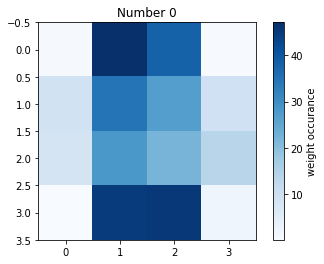

Best positions for 1: ['0_2', '1_1', '1_2', '2_2', '3_2']


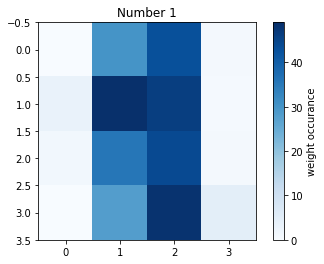

Best positions for 2: ['0_1', '3_1', '3_2']


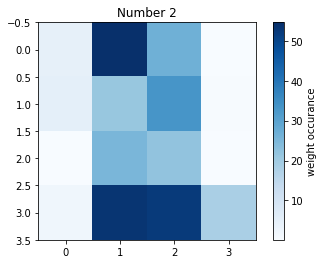

Best positions for 3: ['0_1', '0_2', '1_2', '2_2', '3_1', '3_2']


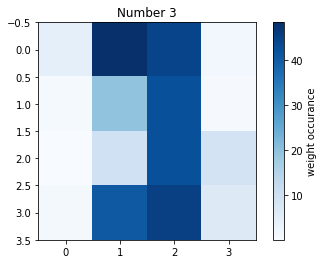

Best positions for 4: ['1_1', '2_1', '2_2']


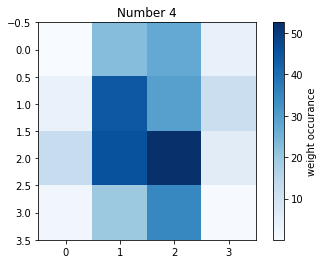

Best positions for 5: ['0_1', '0_2', '1_1', '3_1']


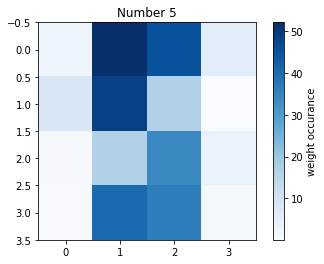

Best positions for 6: ['1_1', '2_1', '3_2']


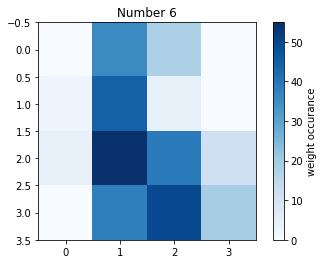

Best positions for 7: ['0_1', '0_2', '1_2', '2_1', '2_2']


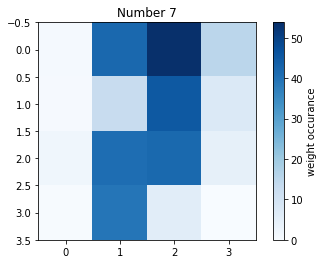

Best positions for 8: ['0_1', '0_2', '1_1', '1_2', '2_1', '3_1', '3_2']


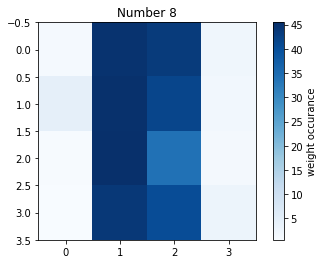

Best positions for 9: ['0_1', '0_2', '1_1', '1_2']


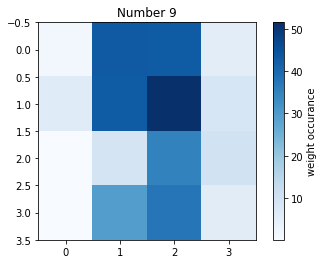

In [486]:
for label in pixel4x4_label:
    plt.imshow(get_weight(label[0], 4), cmap='Blues', interpolation='nearest')
    plt.colorbar(label='weight occurance')
    plt.title("Number " + str(label[0]))
    plt.show()

### Dataset pixel 8x8
In the matrixes of the 8x8 dataset you can see that there is enough detail to regocnize the number.
The best positions to recognize a number are: 
- Best positions for 0: ['0_3', '2_2', '7_3', '7_4']
- Best positions for 1: ['1_4', '2_3', '2_4', '3_3', '3_4', '4_4', '5_4', '6_4']
- Best positions for 2: ['0_3', '1_2', '6_3', '7_3', '7_4']
- Best positions for 3: ['0_3', '0_4', '3_4', '6_5', '7_3', '7_4']
- Best positions for 4: ['4_2', '4_5', '5_4']
- Best positions for 5: ['0_3', '0_4', '1_2', '2_2', '7_3']
- Best positions for 6: ['3_2', '4_2', '5_2', '7_4', '7_5']
- Best positions for 7: ['0_3', '0_4', '4_3', '4_4']
- Best positions for 8: ['0_3', '4_3', '7_3']
- Best positions for 9: ['2_5', '3_5']

In [487]:
pixel8x8_mean = pixel8x8_label.mean()
# display(pixel8x8_mean)

Best positions for 0: ['0_3', '2_2', '7_3', '7_4']


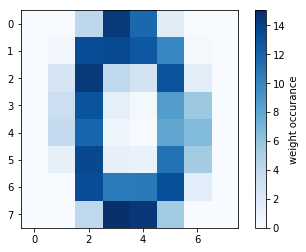

Best positions for 1: ['1_4', '2_3', '2_4', '3_3', '3_4', '4_4', '5_4', '6_4']


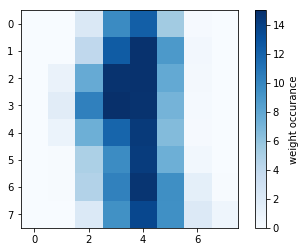

Best positions for 2: ['0_3', '1_2', '6_3', '7_3', '7_4']


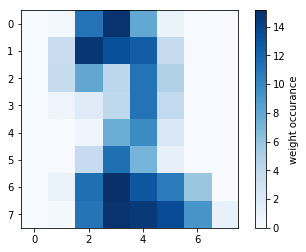

Best positions for 3: ['0_3', '0_4', '3_4', '6_5', '7_3', '7_4']


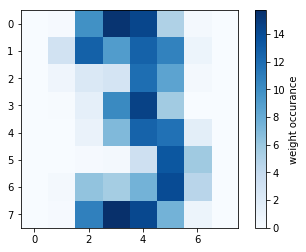

Best positions for 4: ['4_2', '4_5', '5_4']


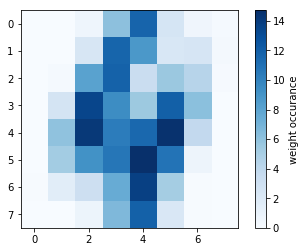

Best positions for 5: ['0_3', '0_4', '1_2', '2_2', '7_3']


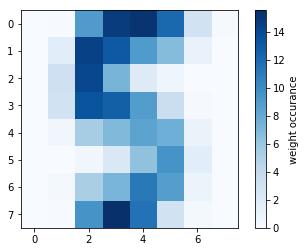

Best positions for 6: ['3_2', '4_2', '5_2', '7_4', '7_5']


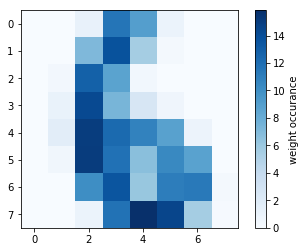

Best positions for 7: ['0_3', '0_4', '4_3', '4_4']


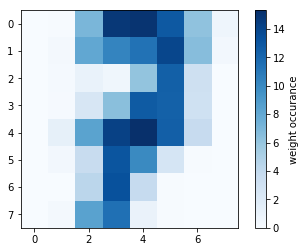

Best positions for 8: ['0_3', '4_3', '7_3']


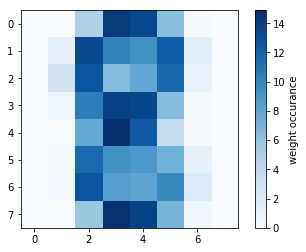

Best positions for 9: ['2_5', '3_5']


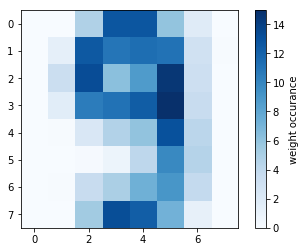

In [488]:
for label in pixel8x8_label:
    plt.imshow(get_weight(label[0], 8), cmap='Blues', interpolation='nearest')
    plt.colorbar(label='weight occurance')
    plt.show()